In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import plot
import lifeline

In [14]:
# Specify paths to velocity field and mesh
#readdir = '/Users/daanreijnders/Datasets/'
readdir = '/scratch/DaanR/fields/'

writedir = ''
field_file = 'daily_CESM_0.1degree_controlrun_year_300_arctic_region_timed.nc'
mesh_new = 'POP_grid_lat1800plus.nc'
mesh_old = 'grid_coordinates_pop_tx0.1.nc'

In [15]:
ds_new = xr.open_dataset(readdir+mesh_new)
print(ds_new)

<xarray.Dataset>
Dimensions:   (i_index: 3600, j_index: 601)
Coordinates:
  * i_index   (i_index) int32 1 2 3 4 5 6 7 ... 3595 3596 3597 3598 3599 3600
  * j_index   (j_index) int32 1800 1801 1802 1803 1804 ... 2397 2398 2399 2400
Data variables:
    U_LON_2D  (j_index, i_index) float32 ...
    U_LAT_2D  (j_index, i_index) float32 ...
Attributes:
    CDI:              Climate Data Interface version 1.9.6 (http://mpimet.mpg...
    Conventions:      CF-1.6
    history:          Tue May 28 15:26:46 2019: cdo select,name=U_LAT_2D,U_LO...
    title:            t.t0.1_42l_nccs01.007502
    input_data:       t.t0.1_42l_nccs01.007502
    conversion_code:  produced with pop_da4_to_nc.f90
    CDO:              Climate Data Operators version 1.9.6 (http://mpimet.mpg...


In [16]:
ds_old = xr.open_dataset(readdir+field_file)
print(ds_old)

<xarray.Dataset>
Dimensions:  (nlat: 601, nlon: 3600, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-30
    ULON     (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
  * nlon     (nlon) float64 1.0 2.0 3.0 4.0 ... 3.598e+03 3.599e+03 3.6e+03
  * nlat     (nlat) float64 1.8e+03 1.801e+03 1.802e+03 ... 2.399e+03 2.4e+03
Data variables:
    UVEL_5m  (time, nlat, nlon) float32 ...
    VVEL_5m  (time, nlat, nlon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-current...
    history:      Sun May 19 13:41:52 2019: cdo settunits,days -settaxis,2000...
    source:       CCSM POP2, the CCSM Ocean Component
    title:        UVEL_5m and VVEL_5m of year 300 of high resolution CESM con...
    contents:     Diagnostic and Prognostic Variables
    revision:     $Id: tavg.F90 34115 2012-01-25 22:35:19Z njn01 $
    c

In [17]:
ULON_new = ds_new['U_LON_2D']
ULON_old = ds_old['ULON']
ULAT_new = ds_new['U_LAT_2D']
ULAT_old = ds_old['ULAT']

In [18]:
ULON_old.shape

(601, 3600)

In [19]:
ULON_new.shape

(601, 3600)

In [20]:
print(ULON_old[300,300]-ULON_new[300,300])
print(ULAT_old[300,300]-ULAT_new[300,300])

<xarray.DataArray ()>
array(-3.393986e-06)
Coordinates:
    ULON     float64 ...
    ULAT     float64 ...
    nlon     float64 301.0
    nlat     float64 2.1e+03
    i_index  int32 301
    j_index  int32 2100
<xarray.DataArray ()>
array(1.95471e-06)
Coordinates:
    ULON     float64 ...
    ULAT     float64 ...
    nlon     float64 301.0
    nlat     float64 2.1e+03
    i_index  int32 301
    j_index  int32 2100


In [21]:
print(ULON_old[500,1200]-ULON_new[500,1200])
print(ULAT_old[500,1200]-ULAT_new[500,1200])

<xarray.DataArray ()>
array(-2.144972e-07)
Coordinates:
    ULON     float64 ...
    ULAT     float64 ...
    nlon     float64 1.201e+03
    nlat     float64 2.3e+03
    i_index  int32 1201
    j_index  int32 2300
<xarray.DataArray ()>
array(3.285902e-06)
Coordinates:
    ULON     float64 ...
    ULAT     float64 ...
    nlon     float64 1.201e+03
    nlat     float64 2.3e+03
    i_index  int32 1201
    j_index  int32 2300


In [22]:
print(ULAT_old[550,1450]-ULAT_new[550,1450])

<xarray.DataArray ()>
array(7.06015e-07)
Coordinates:
    ULON     float64 ...
    ULAT     float64 ...
    nlon     float64 1.451e+03
    nlat     float64 2.35e+03
    i_index  int32 1451
    j_index  int32 2350


In [23]:
lonDiff = ULON_old.data-ULON_new.data
latDiff = ULAT_old.data-ULAT_new.data

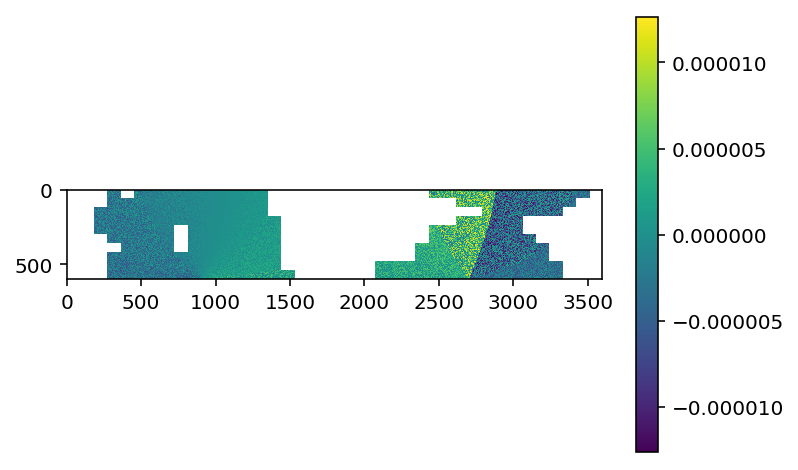

In [24]:
plt.imshow(np.where(ULAT_old == -1, np.NaN, lonDiff))
plt.colorbar()
plt.show()

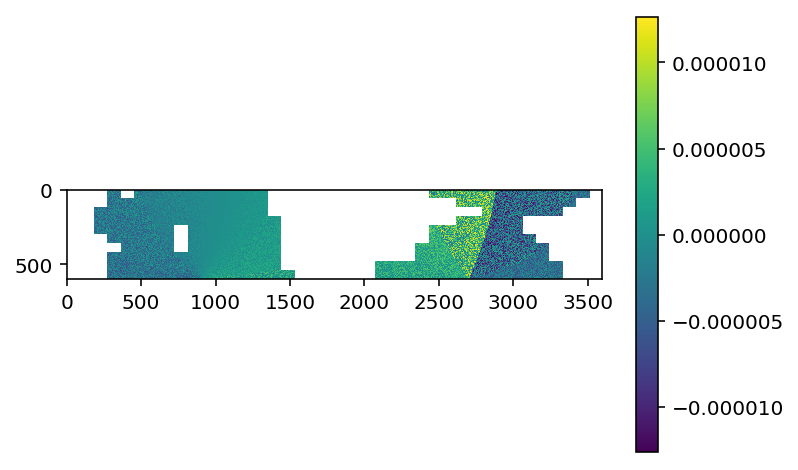

In [74]:
plt.imshow(np.where(ULAT_old == -1, np.NaN, latDiff))
plt.colorbar()
plt.show()